### Importando dados

In [ ]:
import pandas as pd

resenha = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Base de dados/imdb-reviews-pt-br.csv")

resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
print(resenha.value_counts("sentiment"))

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### Definindo neg = 0 pos = 1

In [ ]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
classificacao.head()

/tmp/ipython-input-1386285043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])


,sentiment
0,0
1,0
2,0
3,0
4,0


In [ ]:
resenha["classificacao"] = classificacao
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


### Bag of words - entendendo o funcinamento

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [ ]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                           columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


Bag of words - aplicando no caso real

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])
print(bag_of_words.shape)

(49459, 50)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)

  regressao_logistica = LogisticRegression(solver = "lbfgs")
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


### Criando uma visualização

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

todas_palavras = " ".join([texto for texto in resenha["text_pt"]])

In [ ]:
len(todas_palavras)

63448424

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500,
                          random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

In [ ]:
nuvem_palavras

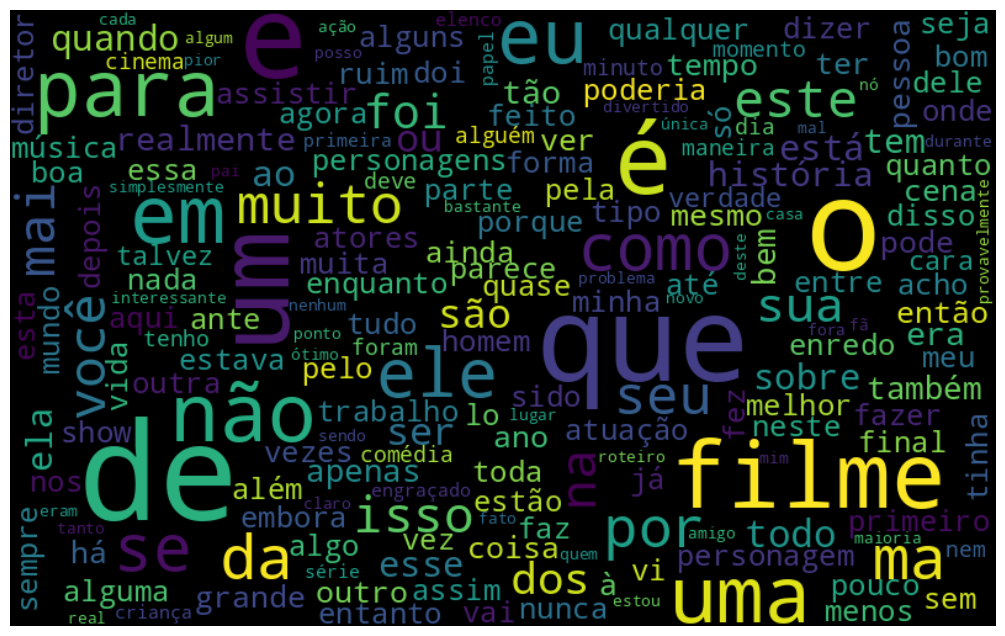

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.show()

### Criando filtros com o .query para criação da CloudWord positiva e negativa

In [ ]:
def nuvem_palavras_negativas(texto, coluna_texto):

  texto_neg = texto.query("sentiment == 'neg'")

  todas_palavras = " ".join([texto for texto in texto_neg[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500,
                            random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
def nuvem_palavras_positivo(texto, coluna_texto):

  texto_positivo = texto.query("sentiment == 'pos'")

  todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500,
                            random_state=21, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

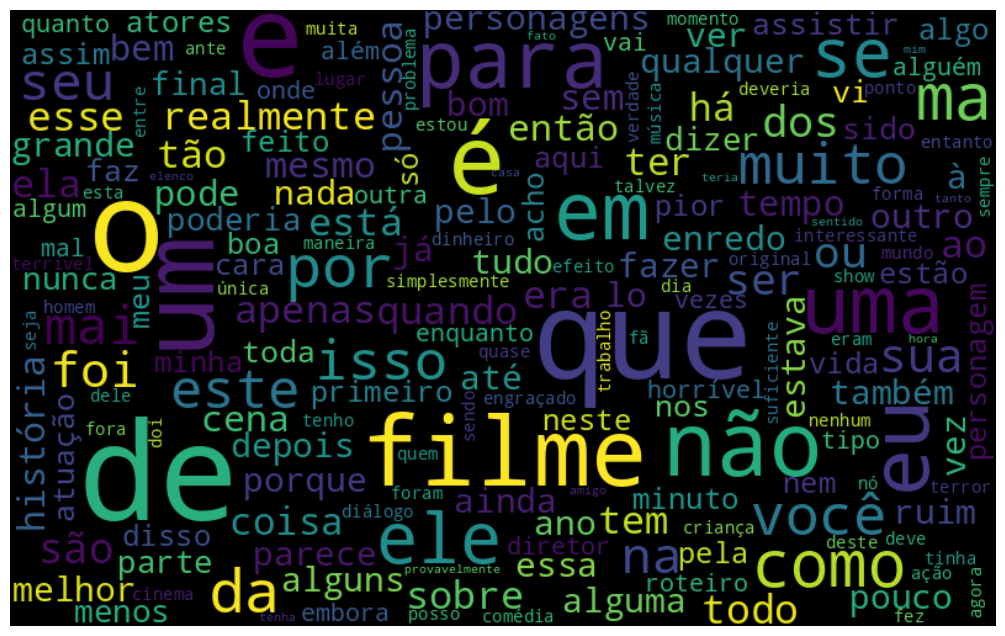

In [ ]:
nuvem_palavras_negativas(resenha, "text_pt")

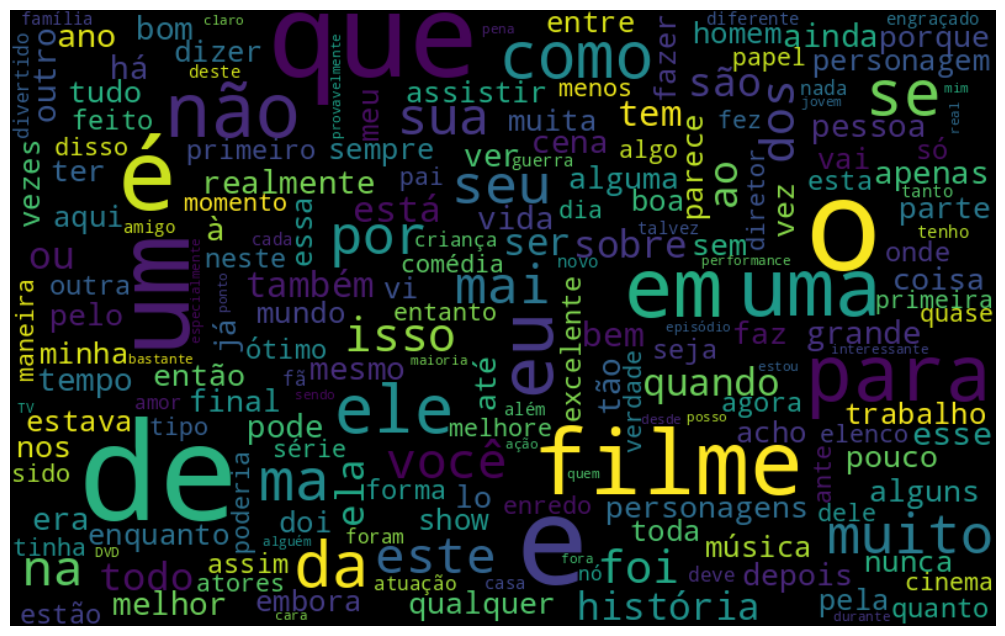

In [ ]:
nuvem_palavras_positivo(resenha, "text_pt")

### Entendendo o funcionamento do nltk

In [ ]:
import nltk

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

In [ ]:
from nltk import tokenize

frase = 'Isso é um teste'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

### Aplicando a tokenização

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia.most_common(10)

In [ ]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequencia": list(frequencia.values())})

In [ ]:
df_frequencia.nlargest(columns = "Frequencia", n = 10)

### Criando uma visualização das palavras mais frequentes

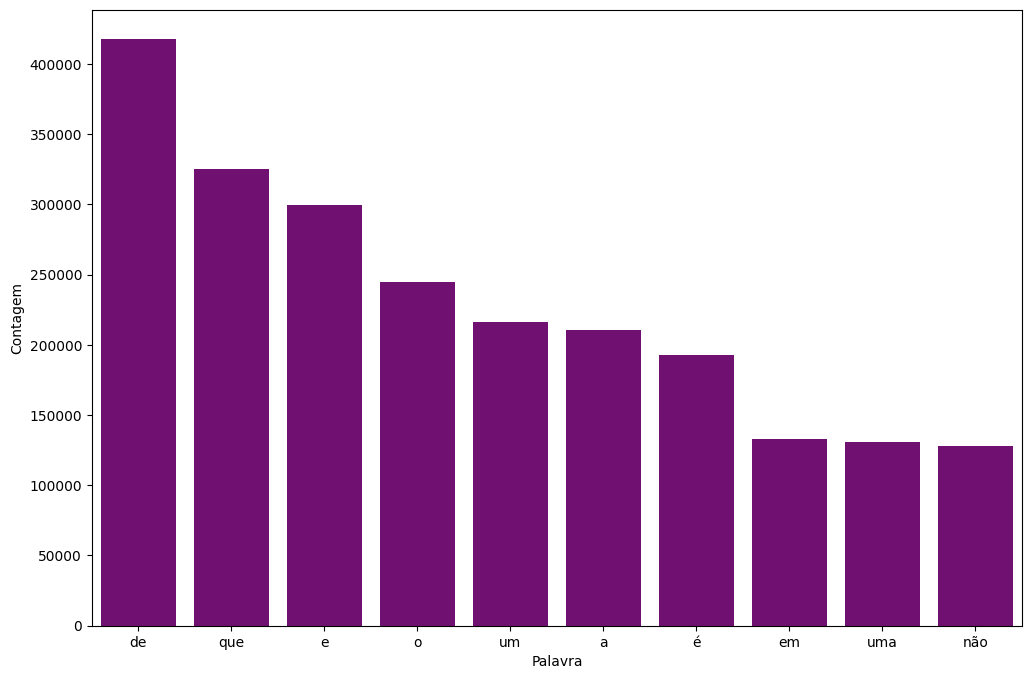

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequencia": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia", color = 'purple')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

### Tratando as stop-words

In [47]:
import nltk

stop_words = nltk.corpus.stopwords.words("portuguese")

207
['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele']


In [48]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [49]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [51]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [52]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6810351799433886

### Criando a visualização com o primeiro tratamento

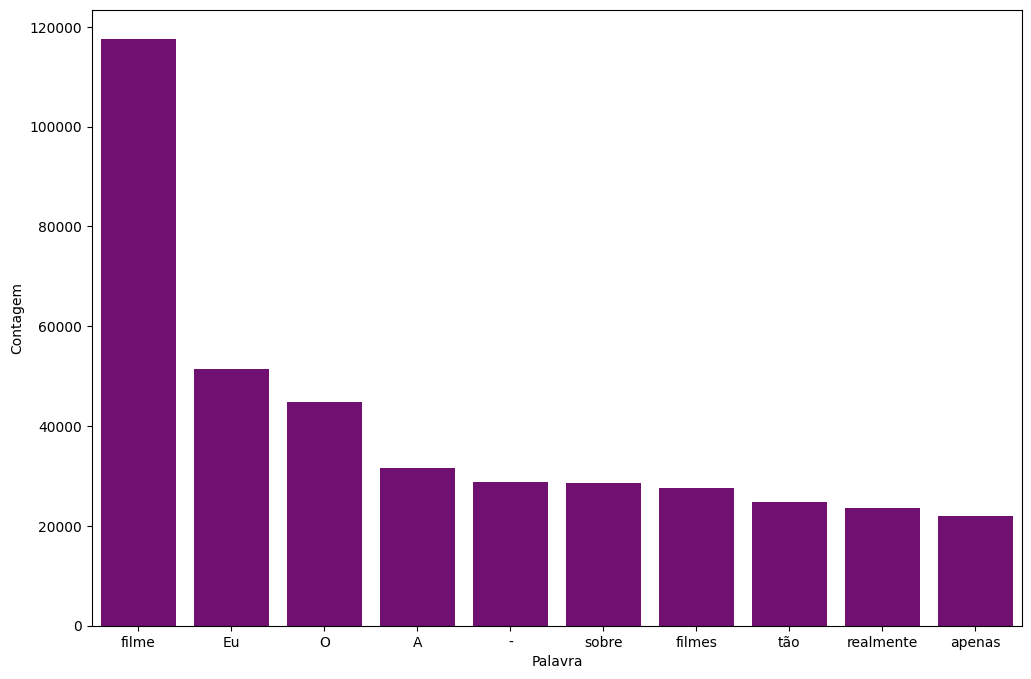

In [53]:
pareto(resenha, "tratamento_1", 10)